In [1]:
import pandas as pd
# load the source data for each panel 
df = pd.read_excel('./SD_SUPP_FIG2.xlsx',engine='openpyxl',sheet_name='Panel_a',index_col=0)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1.0_Silently attemped pretrain v.s. 1.0_No pretrain: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.706e-04 U_stat=9.700e+01
0.1_Silently attemped pretrain v.s. 0.1_No pretrain: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.653e-04 U_stat=1.000e+02


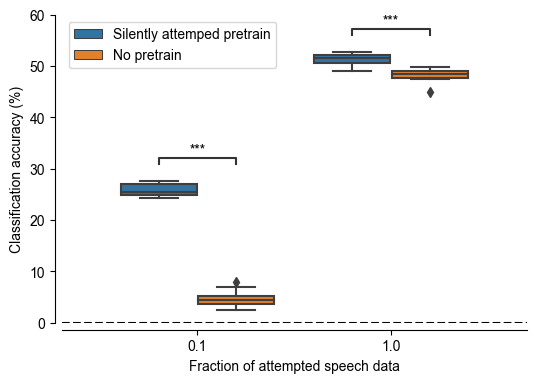

In [2]:
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib as mpl
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(6,4))
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams.update({'font.size': 10})

sns.boxplot(ax=ax,data=df,x='Fraction of overt data',y='Accuracy',hue='paradigm')
test_results = add_stat_annotation(ax, data=df,x='Fraction of overt data',y='Accuracy',hue='paradigm', 
                                   box_pairs = [((0.1,'Silently attemped pretrain'),(0.1,'No pretrain')),
                                               ((1.0,'Silently attemped pretrain'),(1.0,'No pretrain'))],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2,line_offset=0.01)


ax.set_xlabel('Fraction of attempted speech data')
ax.spines[['top','right']].set_visible(False)
ax.set_ylabel('Classification accuracy (%)')
ax.legend(title='')

ax.set_yticks([0,10,20,30,40,50,60])
ax.set_ylim([0,60])
ax.axhline(1/104.,color='k', linestyle='--')
sns.despine(ax=ax, offset=dict(left=5, bottom=5))

plt.savefig('./figure_S2.jpg',dpi=300,bbox_inches='tight')

In [3]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df[(df.paradigm == 'Silently attemped pretrain') & (df['Fraction of overt data'] == 0.1)].Accuracy,
             df[(df.paradigm == 'No pretrain') & (df['Fraction of overt data'] == 0.1)].Accuracy)

MannwhitneyuResult(statistic=100.0, pvalue=0.00018267179110955002)

In [4]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df[(df.paradigm == 'Silently attemped pretrain') & (df['Fraction of overt data'] == 1)].Accuracy,
             df[(df.paradigm == 'No pretrain') & (df['Fraction of overt data'] == 1)].Accuracy)

MannwhitneyuResult(statistic=97.0, pvalue=0.0004352787705177256)